In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rc('font', family='Malgun Gothic')

file_path = 'OTg6QzA_activities.csv'
plt = pd.read_csv(file_path)


plt.info()
plt.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66281 entries, 0 to 66280
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  66281 non-null  object
 1   X          66281 non-null  int64 
 2   Y          66281 non-null  int64 
 3   Z          66281 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ MB


,timestamp,X,Y,Z
0,2022-01-01 00:01:40.363,33,76,56
1,2022-01-01 00:01:42.961,34,87,56
2,2022-01-01 00:01:45.562,25,89,47
3,2022-01-01 00:01:48.163,11,70,50
4,2022-01-01 00:02:08.864,33,72,58


In [20]:
import matplotlib.pyplot as plt  # Matplotlib 
matplotlib.rc('font', family='Malgun Gothic') #한글 깨짐방지지

In [21]:
import pandas as pd

# 데이터 다시 불러오기 (파일 경로 확인)
file_path = "OTg6QzA_activities.csv"

df = pd.read_csv(file_path)  # 데이터를 df에 저장 (plt가 아니라 df!)
df['timestamp'] = pd.to_datetime(df['timestamp'])  # timestamp 변환

# 데이터 제대로 저장됐는지 확인
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66281 entries, 0 to 66280
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  66281 non-null  datetime64[ns]
 1   X          66281 non-null  int64         
 2   Y          66281 non-null  int64         
 3   Z          66281 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.0 MB


,timestamp,X,Y,Z
0,2022-01-01 00:01:40.363,33,76,56
1,2022-01-01 00:01:42.961,34,87,56
2,2022-01-01 00:01:45.562,25,89,47
3,2022-01-01 00:01:48.163,11,70,50
4,2022-01-01 00:02:08.864,33,72,58


In [22]:
df.isnull().sum() #결측치 확인인

timestamp    0
X            0
Y            0
Z            0
dtype: int64

c:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


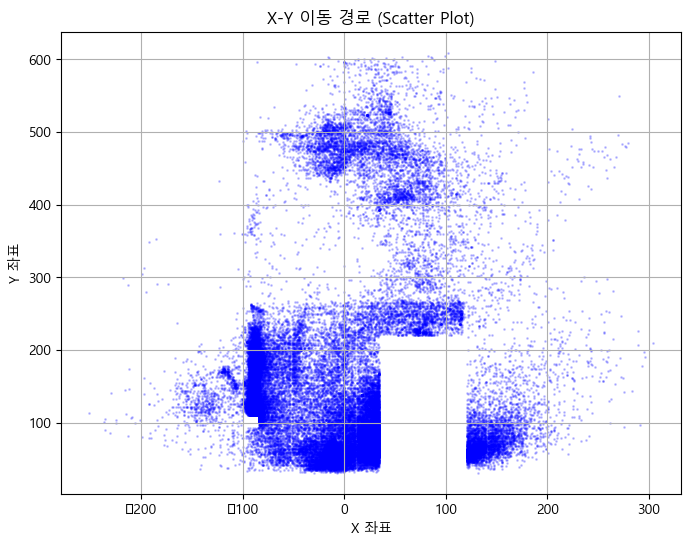

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['Y'], s=1, alpha=0.2, color='blue')

plt.title("X-Y 이동 경로 (Scatter Plot)")
plt.xlabel("X 좌표")
plt.ylabel("Y 좌표")
plt.grid(True)

plt.show()

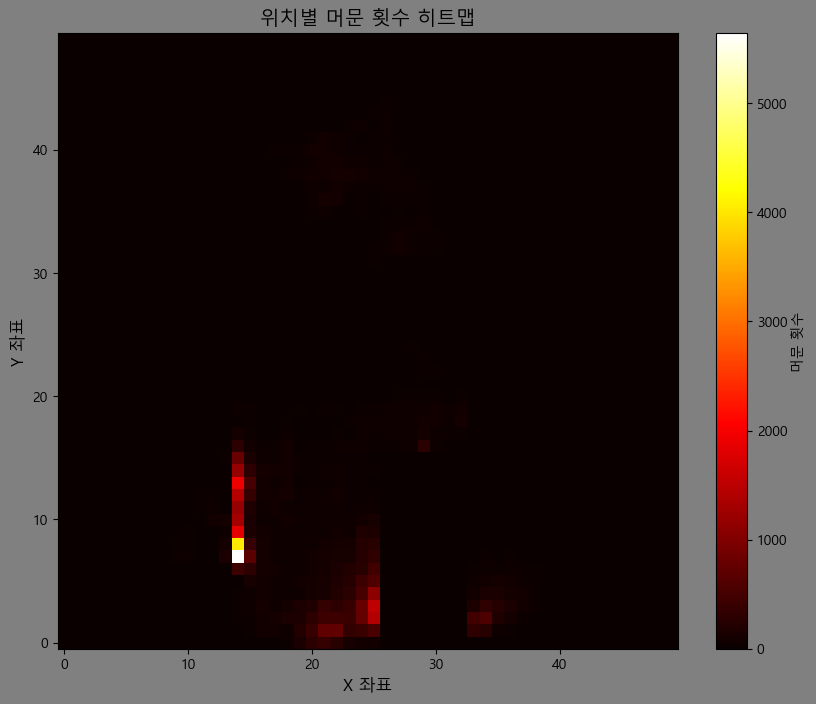

In [ ]:
import numpy as np

plt.figure(figsize=(10, 8), facecolor='grey')

# 격자로 나눠서 X, Y 좌표 빈도 분석
heatmap, x, y = np.histogram2d(df['X'], df['Y'], bins=(50, 50))

# 히트맵 출력
plt.imshow(heatmap.T, origin='lower', cmap='hot', aspect='auto')

plt.colorbar(label="머문 횟수")
plt.title("위치별 머문 횟수 히트맵", fontsize=14)
plt.xlabel("X 좌표", fontsize=12)
plt.ylabel("Y 좌표", fontsize=12)

plt.show()

In [30]:
print(df.dtypes)  # 데이터 타입 확인


timestamp    datetime64[ns]
X                     int64
Y                     int64
Z                     int64
dtype: object


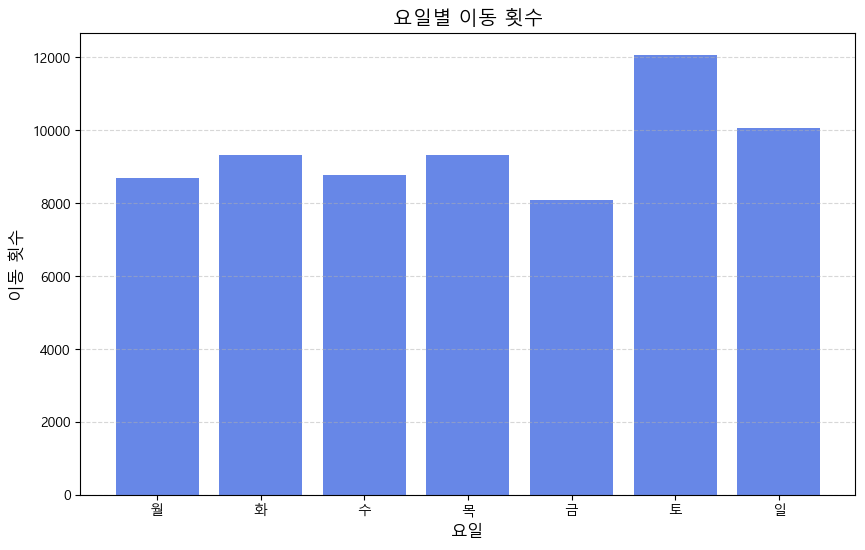

In [ ]:
import matplotlib.pyplot as plt

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['weekday'] = df['timestamp'].dt.dayofweek

# 요일별 이동 횟수 집계
weekday_counts = df['weekday'].value_counts().sort_index()

# 요일 이름 설정
weekday_labels = ['월', '화', '수', '목', '금', '토', '일']

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(weekday_labels, weekday_counts, color='royalblue', alpha=0.8)

plt.title("요일별 이동 횟수", fontsize=14)
plt.xlabel("요일", fontsize=12)
plt.ylabel("이동 횟수", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [32]:
df['hour'] = df['timestamp'].dt.hour

C:\Users\user\AppData\Local\Temp\ipykernel_10548\8585670.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dx'].fillna(0, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_10548\8585670.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

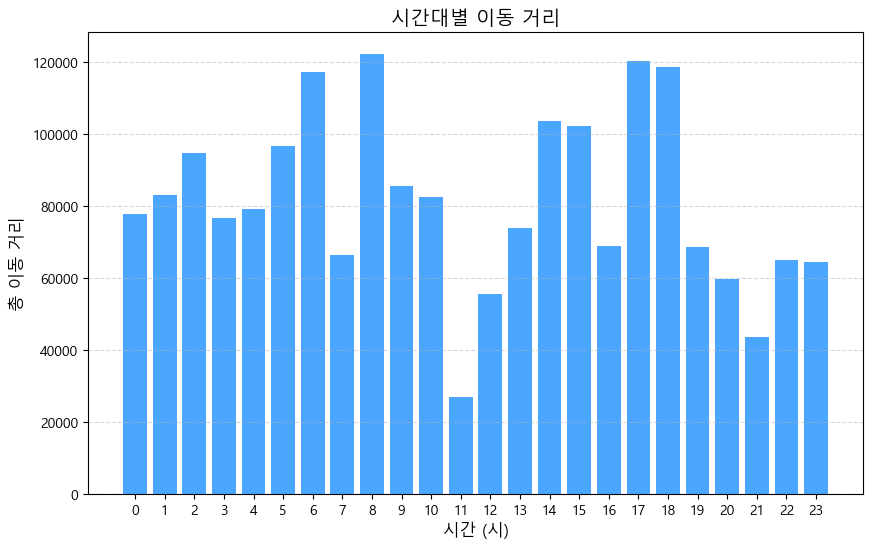

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# 🔹 X, Y 좌표의 차이를 이용하여 이동 거리 계산
df['dx'] = df['X'].diff()  # X 변화량
df['dy'] = df['Y'].diff()  # Y 변화량

# 🔹 유클리드 거리(2D 이동 거리) 계산
df['distance'] = np.sqrt(df['dx']**2 + df['dy']**2)

# 🔹 결측치 채우기
df['dx'].fillna(0, inplace=True)
df['dy'].fillna(0, inplace=True)
df['distance'].fillna(0, inplace=True)

# 🔹 시간대별 이동 거리 분석
df['hour'] = df['timestamp'].dt.hour
hourly_movement = df.groupby('hour')['distance'].sum()

# 🔹 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(hourly_movement.index, hourly_movement.values, color='dodgerblue', alpha=0.8)

plt.title("시간대별 이동 거리", fontsize=14)
plt.xlabel("시간 (시)", fontsize=12)
plt.ylabel("총 이동 거리", fontsize=12)
plt.xticks(range(0, 24))  # 0~23시간 표시
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()